In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
def softmax(x):
    # Calcule la fonction softmax pour normaliser les scores en probabilités.
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def negative_gradient(y, p):
    # Calcule le gradient négatif, utilisé pour l'optimisation.
    return y - p

def fit(X, y, n_estimators=100, learning_rate=0.1):
    # Entraîne un modèle de boosting avec des arbres de décision.
    # X : caractéristiques, y : étiquettes, n_estimators : nombre d'arbres, learning_rate : taux d'apprentissage.

    # Préparation pour la classification multiclasse.
    n_samples, n_classes = len(y), len(np.unique(y))
    y_encoded = np.zeros((n_samples, n_classes))
    y_encoded[np.arange(n_samples), y] = 1

    # Initialisation des prédictions et des arbres.
    f = np.zeros((n_samples, n_classes))
    trees = []

    # Boucle pour construire chaque arbre.
    for _ in range(n_estimators):
        # Calcul des résidus.
        residuals = negative_gradient(y_encoded, softmax(f))
        trees_for_iteration = []
        for j in range(n_classes):
            # Construction d'un arbre pour chaque classe.
            tree = DecisionTreeRegressor(max_depth=2)
            tree.fit(X, residuals[:, j])
            trees_for_iteration.append(tree)
        trees.append(trees_for_iteration)

        # Mise à jour des prédictions avec les arbres nouvellement créés.
        for j, tree in enumerate(trees_for_iteration):
            update = tree.predict(X)
            f[:, j] += learning_rate * update

    return trees

def predict_proba(X, trees, learning_rate=0.1):
    # Calcule les probabilités de classe pour les données X.
    n_samples = X.shape[0]
    f = np.zeros((n_samples, len(trees[0])))
    for trees_for_iteration in trees:
        for j, tree in enumerate(trees_for_iteration):
            update = tree.predict(X)
            f[:, j] += learning_rate * update
    return softmax(f)

def predict(X, trees, learning_rate=0.1):
    # Prédit la classe pour chaque échantillon dans X.
    probas = predict_proba(X, trees, learning_rate)
    return np.argmax(probas, axis=1)


In [12]:
import numpy as np# Préparation pour la classification multiclasse.
y=[1,0,1,0,1,1,0]
n_samples, n_classes = len(y), len(np.unique(y))
y_encoded = np.zeros((n_samples, n_classes))
y_encoded[np.arange(n_samples), y] = 1

    # Initialisation des prédictions et des arbres.
f = np.zeros((n_samples, n_classes))
trees = []


array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

array([[-0.5,  0.5],
       [ 0.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5],
       [-0.5,  0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5]])

In [7]:
def plot_training_test_error(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1):
    # Fonction pour tracer les erreurs d'entraînement et de test en fonction du nombre d'arbres dans le modèle.

    # Initialisation des listes pour enregistrer les erreurs.
    train_errors, test_errors = [], []

    # Boucle sur le nombre d'estimateurs (arbres) à utiliser.
    for i in range(1, n_estimators + 1):
        # Entraînement du modèle avec i arbres.
        trees = fit(X_train, y_train, n_estimators=i, learning_rate=learning_rate)

        # Calcul des probabilités sur les ensembles d'entraînement et de test.
        train_proba = predict_proba(X_train, trees, learning_rate)
        test_proba = predict_proba(X_test, trees, learning_rate)

        # Calcul et enregistrement des erreurs de log loss.
        train_errors.append(log_loss(y_train, train_proba))
        test_errors.append(log_loss(y_test, test_proba))

    # Tracé des courbes d'erreur.
    plt.plot(train_errors, label='Train Error')
    plt.plot(test_errors, label='Test Error')
    plt.xlabel('Number of Trees')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.title('Training and Test Error vs Number of Trees')
    plt.show()






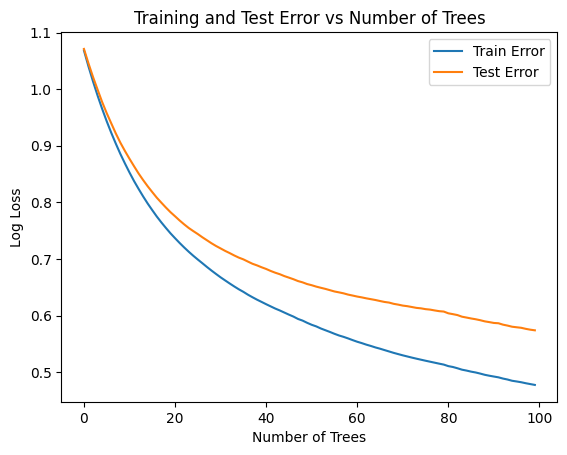

In [8]:
# Création d'un jeu de données pour la démonstration.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=3, n_classes=3, random_state=42)

# Séparation du jeu de données en ensembles d'entraînement et de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appel de la fonction pour tracer les erreurs d'entraînement et de test.
plot_training_test_error(X_train, y_train, X_test, y_test, n_estimators=100)